In [1]:
from hw4_utils import *
import os

In [2]:
bd_model = 'log_files_brown_dwarf/0.01_model_brown_dwarf_hist.data'
prems_model = 'log_files_prems_arch/0.2_model_prems_hist.data'

# Load the data
df1 = read_data(bd_model)
df2 = read_data(prems_model)

In [3]:
get_abundance_points(df2,'center_h2')

np.int64(14)

In [4]:
colors = ['purple','gold']
linestyles = ['-', '--']
labels = [r'$0.01M_{\odot}$ Brown Dwarf', r'$0.2M_{\odot}$ Pre-MS star']

Plotting $0.01M_{\odot}$ Brown Dwarf
Plotting $0.2M_{\odot}$ Pre-MS star


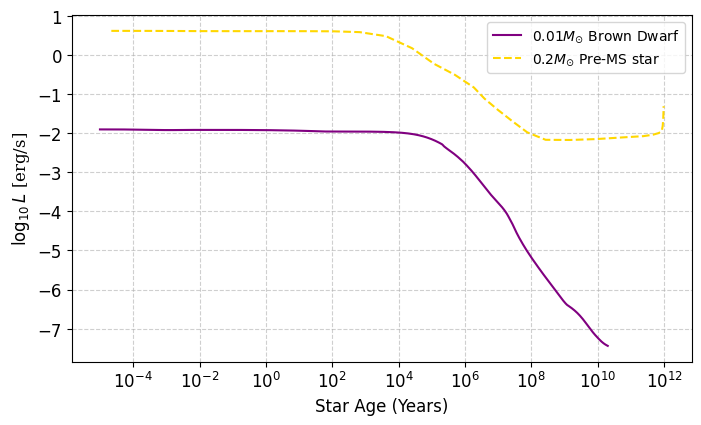

In [5]:
property_col = 'log_L'
property_label = r'$\log_{10} L$ [erg/s]'

# Set up the plot
fig, ax = plt.subplots(figsize=(16/2,9/2))

# Plot the data
for i, df in enumerate([df1, df2]):
    print(f'Plotting {labels[i]}')
    plot_property_vs_age(df=df, 
                            ax=ax,
                         property_col=property_col, 
                         color=colors[i], lstyl=linestyles[i], 
                         label=labels[i],ylabl=property_label)
fig.savefig('mesa_part_a.png', dpi=300, bbox_inches='tight')

Plotting $0.01M_{\odot}$ Brown Dwarf
Plotting $0.2M_{\odot}$ Pre-MS star


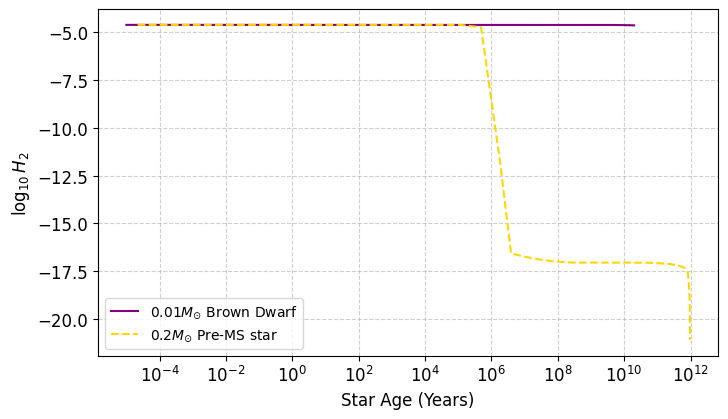

In [6]:
property_col = 'log_center_h2'
property_label = r'$\log_{10}H_2$ '

# Set up the plot
fig, ax = plt.subplots(figsize=(16/2,9/2))

# Plot the data
for i, df in enumerate([df1, df2]):
    print(f'Plotting {labels[i]}')
    plot_property_vs_age(df=df, 
                            ax=ax,
                         property_col=property_col, 
                         color=colors[i], lstyl=linestyles[i], 
                         label=labels[i], ylabl=property_label)
fig.savefig('mesa_part_b1.png', dpi=300, bbox_inches='tight')

Plotting $0.01M_{\odot}$ Brown Dwarf
Plotting $0.2M_{\odot}$ Pre-MS star


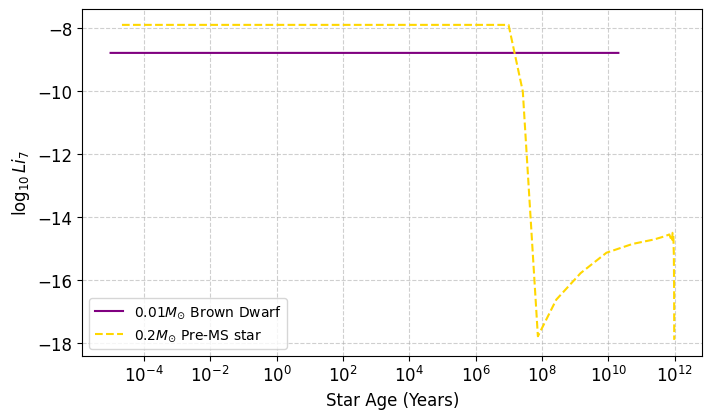

In [7]:
property_col = 'log_center_li7'
property_label = r'$\log_{10} Li_7$'

# Load the data
df1 = read_data(bd_model)
df2 = read_data(prems_model)

# Set up the plot
fig, ax = plt.subplots(figsize=(16/2,9/2))

# Plot the data
for i, df in enumerate([df1, df2]):
    print(f'Plotting {labels[i]}')
    plot_property_vs_age(df=df, 
                            ax=ax,
                         property_col=property_col, 
                         color=colors[i], lstyl=linestyles[i], 
                         label=labels[i], ylabl=property_label)
fig.savefig('mesa_part_b2.png', dpi=300, bbox_inches='tight')

Plotting $0.01M_{\odot}$ Brown Dwarf
Plotting $0.2M_{\odot}$ Pre-MS star


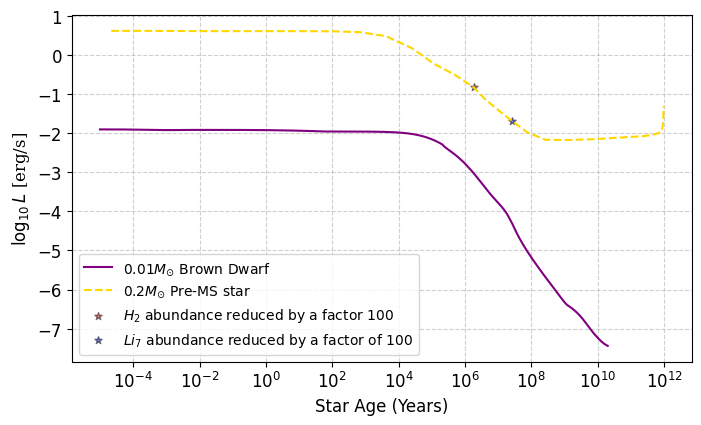

In [8]:
property_col = 'log_L'
property_label = r'$\log_{10} L$ [erg/s]'

# Set up the plot
fig, ax = plt.subplots(figsize=(16/2,9/2))

# Plot the data
for i, df in enumerate([df1, df2]):
    print(f'Plotting {labels[i]}')
    plot_property_vs_age(df=df, 
                            ax=ax,
                         property_col=property_col, 
                         color=colors[i], lstyl=linestyles[i], 
                         label=labels[i],ylabl=property_label,
                         get_abundance=True,
                         ab_ssize=30)
fig.savefig('mesa_part_b.png', dpi=300, bbox_inches='tight')

In [9]:

def plot_models(property_col='log_L',ylbl=None,set_yscale='linear',save_file=None,get_ab=True):    
    # Read all log files in log_files_brown_dwarf
    log_files1 = os.listdir('log_files_brown_dwarf')
    log_files2 = os.listdir('log_files_prems_arch')
    log_files1 = [f for f in log_files1 if f.endswith('.data')]
    log_files2 = [f for f in log_files2 if f.endswith('.data')]

    # Read all log files
    dfs_bd = [read_data(f'log_files_brown_dwarf/{f}') for f in log_files1]
    dfs_ms = [read_data(f'log_files_prems_arch/{f}') for f in log_files2]

    dfs = dfs_bd + dfs_ms
    log_files = log_files1 + log_files2
    fig, ax = plt.subplots(figsize=(16/2,9/2))
    colors = []
    linestyles = []

    ax.set_yscale(set_yscale)

    # Ensure we have enough colors for all dataframes
    if len(colors) < len(dfs):
        colors = plt.get_cmap('Paired', len(dfs)).colors
    
    if len(linestyles) < len(dfs):
        linestyles = ['-', '--', '-.', ':'] * (len(dfs) // 4 + 1)

    add_ab_lbls = [False]*len(dfs)
    add_ab_lbls[8] = True
    for i, df in enumerate(dfs):
        plot_property_vs_age(df=df, property_col=property_col,
                            ax=ax, label=f'{log_files[i][:-10]}',
                              color=colors[i],ylabl=ylbl, lstyl=linestyles[i],
                              get_abundance=get_ab, ab_ssize=30,add_abundance_lbls=add_ab_lbls[i])
        
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        
    if save_file is None:
        save_file = f'mesa_{property_col}_part_c.png'
        fig.savefig(save_file, dpi=300, bbox_inches='tight')

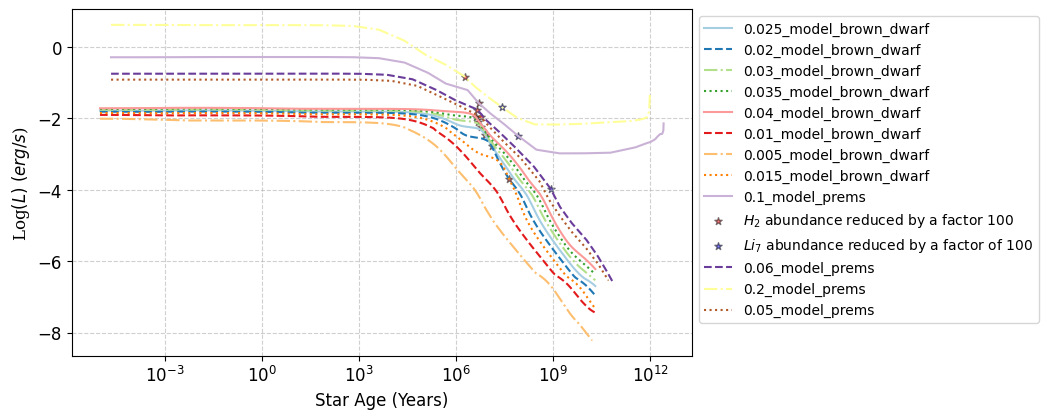

In [10]:
plot_models(property_col='log_L',ylbl=r'Log$(L)$ $(erg/s$)')

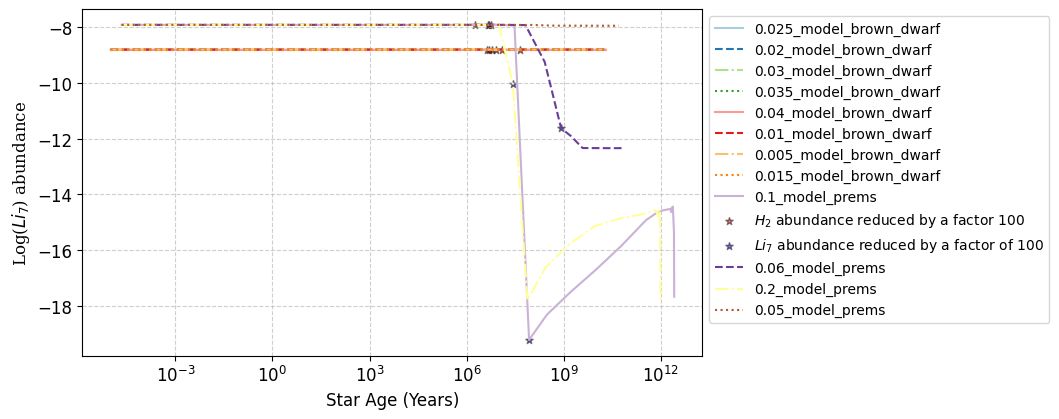

In [11]:
plot_models(property_col='log_center_li7',ylbl=r'Log($Li_7$) abundance',set_yscale='linear')

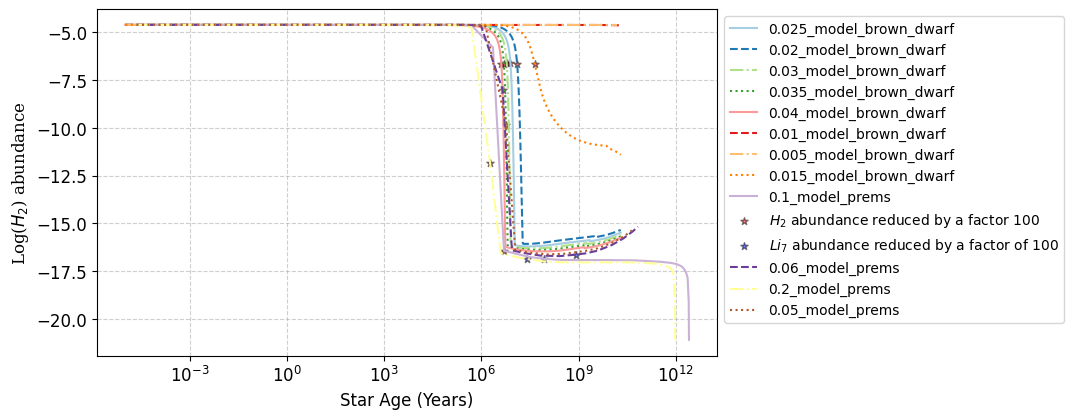

In [12]:
plot_models(property_col='log_center_h2',ylbl=r'Log($H_2$) abundance',set_yscale='linear')